<a href="https://colab.research.google.com/github/Sumit1412/DeepLearning/blob/main/YouTube_Transcript_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install -q transformers

     |████████████████████████████████| 5.8 MB 8.2 MB/s 
     |████████████████████████████████| 7.6 MB 54.6 MB/s 
     |████████████████████████████████| 182 kB 53.5 MB/s 


In [23]:
!pip install -q youtube_transcript_api

In [24]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [40]:
Youtube_video = 'https://www.youtube.com/watch?v=DLVlW3dOJww'

In [41]:
video_id = Youtube_video.split("=")[1]
video_id

'DLVlW3dOJww'

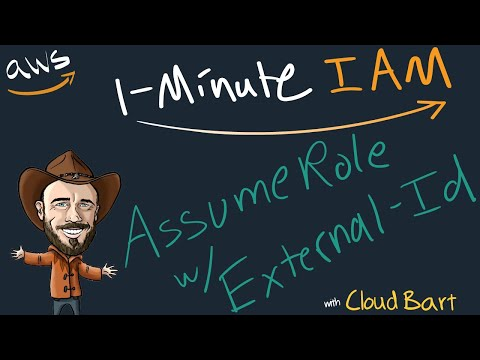

In [42]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [43]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [44]:
transcript

[{'text': '[Music]', 'start': 0.21, 'duration': 9.63},
 {'text': 'hey friends cloud bart here time for',
  'start': 8.16,
  'duration': 3.359},
 {'text': 'another one minute identity and access',
  'start': 9.84,
  'duration': 2.879},
 {'text': 'management lesson', 'start': 11.519, 'duration': 2.641},
 {'text': 'previously you probably heard me talking',
  'start': 12.719,
  'duration': 3.201},
 {'text': 'about using conditions in our policy',
  'start': 14.16,
  'duration': 3.68},
 {'text': 'statements to control when a specific',
  'start': 15.92,
  'duration': 4.08},
 {'text': 'action should be allowed or denied',
  'start': 17.84,
  'duration': 4.0},
 {'text': "today we're focusing on a very specific",
  'start': 20.0,
  'duration': 4.4},
 {'text': 'scenario that involves using the secure',
  'start': 21.84,
  'duration': 3.759},
 {'text': 'token service', 'start': 24.4, 'duration': 4.0},
 {'text': 'and the assume role command which is the',
  'start': 25.599,
  'duration': 4.801},

In [45]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

4852


In [46]:
str(result)

" [Music] hey friends cloud bart here time for another one minute identity and access management lesson previously you probably heard me talking about using conditions in our policy statements to control when a specific action should be allowed or denied today we're focusing on a very specific scenario that involves using the secure token service and the assume role command which is the api call that starts off the process of assuming a role and getting the temporary credentials that we need to use that role as a part of the assume roll command we can also require that an external id is provided now this is particularly useful if you have someone who's maybe managing your aws account for you and you want to provide this additional piece of context around who made that call and what the purpose does for it imagine someone's managing your account and they have some sort of account number or an identifier for you as their customer and you want to have them provide that additional detail h

In [47]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [48]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 [Music] hey friends cloud bart here time for another one minute identity and access management lesson previously you probably heard me talking about using conditions in our policy statements to control when a specific action should be allowed or denied today we're focusing on a very specific scenario that involves using the secure token service and the assume role command which is the api call that starts off the process of assuming a role and getting the temporary credentials that we need to use that role as a part of the assume roll command we can also require that an external id is provided now this is particularly useful if you have someone who's maybe managing your aws account for you and you want to provide this additional piece of context around who made that call and what the purpose does for it imagine someone's managing your account and they have some sort of account number or an identifier for you as their customer and you want to have them provide that addition

In [49]:
len(str(summarized_text))

1552

In [50]:
str(summarized_text)

'[" This is particularly useful if you have someone who\'s maybe managing your aws account for you and you want to provide this additional piece of context around who made that call and what the purpose does for it . We\'re focusing on a very specific scenario that involves using the secure token service and the assume role command .", " In order to get a good feel for this let\'s head over to the dashboard and see how it works moving on over i\'m starting off right here on the command line . If we assume a role that has the right privileges then we should be able to get past this so as a part of this i also h .", " Ave a demo role set up that does have the s3 full access permissions attached to it so this will grant me the right level of permissions now the real magic comes in over here on the trust relationship this is where we designate who\'s allowed to assume the role .", " In order to make use of these credentials we need need to go ahead and export those first i\'ll grab the acc